### Simple Linear Regression



Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import and Load the dataset

In [7]:
dataset = pd.read_csv('/content/1.01.regression.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(dataset)

     SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]


In [8]:
print(X)


[[1714]
 [1664]
 [1760]
 [1685]
 [1693]
 [1670]
 [1764]
 [1764]
 [1792]
 [1850]
 [1735]
 [1775]
 [1735]
 [1712]
 [1773]
 [1872]
 [1755]
 [1674]
 [1842]
 [1786]
 [1761]
 [1722]
 [1663]
 [1687]
 [1974]
 [1826]
 [1787]
 [1821]
 [2020]
 [1794]
 [1769]
 [1934]
 [1775]
 [1855]
 [1880]
 [1849]
 [1808]
 [1954]
 [1777]
 [1831]
 [1865]
 [1850]
 [1966]
 [1702]
 [1990]
 [1925]
 [1824]
 [1956]
 [1857]
 [1979]
 [1802]
 [1855]
 [1907]
 [1634]
 [1879]
 [1887]
 [1730]
 [1953]
 [1781]
 [1891]
 [1964]
 [1808]
 [1893]
 [2041]
 [1893]
 [1832]
 [1850]
 [1934]
 [1861]
 [1931]
 [1933]
 [1778]
 [1975]
 [1934]
 [2021]
 [2015]
 [1997]
 [2020]
 [1843]
 [1936]
 [1810]
 [1987]
 [1962]
 [2050]]


In [9]:
print(y)

[2.4  2.52 2.54 2.74 2.83 2.91 3.   3.   3.01 3.01 3.02 3.07 3.08 3.08
 3.12 3.17 3.17 3.17 3.17 3.19 3.19 3.19 3.2  3.21 3.24 3.28 3.28 3.28
 3.28 3.28 3.28 3.28 3.29 3.29 3.29 3.31 3.32 3.34 3.37 3.37 3.37 3.38
 3.38 3.39 3.39 3.4  3.4  3.4  3.41 3.41 3.41 3.42 3.42 3.42 3.44 3.47
 3.47 3.47 3.47 3.48 3.49 3.49 3.5  3.51 3.51 3.52 3.52 3.54 3.58 3.58
 3.59 3.59 3.6  3.6  3.61 3.62 3.64 3.65 3.71 3.71 3.71 3.73 3.76 3.81]


Print 5 five rows of the dataset

In [10]:
dataset.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


Print last 5 rows of dataset

In [11]:
dataset.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


Get details of dataset

In [12]:
dataset.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Split dataset into training and test set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train)

[[1934]
 [1857]
 [2021]
 [2050]
 [1808]
 [1850]
 [2041]
 [1887]
 [1925]
 [1975]
 [1764]
 [1685]
 [1861]
 [1891]
 [1764]
 [1855]
 [1907]
 [1964]
 [1693]
 [1872]
 [1674]
 [1777]
 [1670]
 [1997]
 [1966]
 [1714]
 [1880]
 [2020]
 [1775]
 [1893]
 [1687]
 [1735]
 [1934]
 [1634]
 [1936]
 [1664]
 [1775]
 [1778]
 [1773]
 [1953]
 [1786]
 [1794]
 [1855]
 [1979]
 [1974]
 [1849]
 [1842]
 [1987]
 [1962]
 [1761]
 [1843]
 [1826]
 [1954]
 [1824]
 [1831]
 [1832]
 [1781]
 [1735]
 [1933]
 [1808]
 [1722]
 [1850]
 [1810]
 [1934]
 [1893]
 [1956]
 [1990]]


In [14]:
print(y_train)

[3.6  3.41 3.61 3.81 3.49 3.38 3.51 3.47 3.4  3.6  3.   2.74 3.58 3.48
 3.   3.29 3.42 3.49 2.83 3.17 3.17 3.37 2.91 3.64 3.38 2.4  3.29 3.28
 3.07 3.5  3.21 3.02 3.28 3.42 3.71 2.52 3.29 3.59 3.12 3.47 3.19 3.28
 3.42 3.41 3.24 3.31 3.17 3.73 3.76 3.19 3.71 3.28 3.34 3.4  3.37 3.52
 3.47 3.08 3.59 3.32 3.19 3.01 3.71 3.54 3.51 3.4  3.39]


In [15]:
print(X_test)

[[1769]
 [1865]
 [1702]
 [1802]
 [1663]
 [1879]
 [1760]
 [1730]
 [1787]
 [1792]
 [1931]
 [1712]
 [1850]
 [2020]
 [1755]
 [1821]
 [2015]]


In [16]:
print(y_test)

[3.28 3.37 3.39 3.41 3.2  3.44 2.54 3.47 3.28 3.01 3.58 3.08 3.52 3.65
 3.17 3.28 3.62]


Training model on training dataset

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Predict the values of test set

In [19]:
y_pred = regressor.predict(X_test)
print(y_pred)

[3.19143271 3.35562407 3.07684082 3.24787349 3.01013808 3.37956865
 3.17603977 3.12472997 3.22221859 3.23077023 3.46850564 3.09394409
 3.32996917 3.62072471 3.16748814 3.2803697  3.61217308]


Visualize

Training

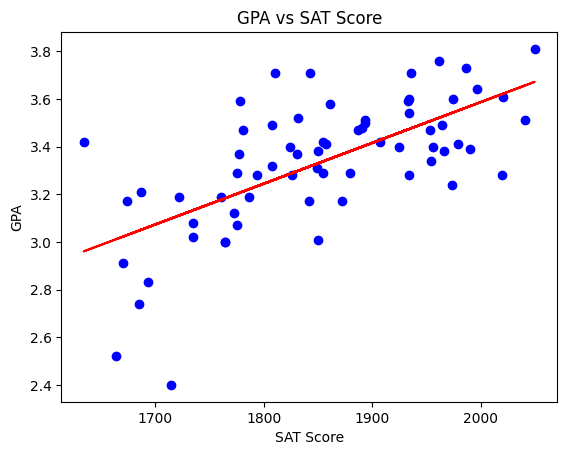

In [20]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('GPA vs SAT Score')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.show()

Testing

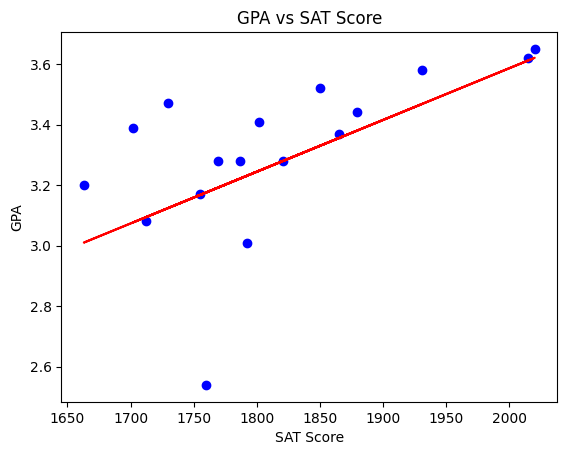

In [21]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.title('GPA vs SAT Score')
plt.xlabel('SAT Score')
plt.ylabel('GPA')
plt.show()

Evaluation Metrics

MSE

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.04691776855623536